In [1]:
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
import pylef
import visa

In [3]:
visa.ResourceManager().list_resources()


('USB0::0x0699::0x03B0::C011192::INSTR',
 'USB0::0xF4ED::0xEE3A::388A15157::INSTR')

In [4]:
func_gen = pylef.BK4052()
scope = pylef.TektronixTBS1062()

Gerador de Funções conectado! Id = *IDN BK Precision,4052,388A15157,1.01.01.31R3,02-00-00-22-26
Osciloscópio conectado! Id = TEKTRONIX,TBS 1062,C011192,CF:91.1CT FV:v26.01


In [5]:
print(func_gen.ch1.wave_info())
print(func_gen.ch2.wave_info())

{'phase': 0.0, 'frequency': 100.0, 'offset': 0.0, 'type': 'sine', 'Vpp': 4.0}
{'phase': 0.0, 'frequency': 1000.0, 'offset': 0.0, 'type': 'sine', 'Vpp': 4.0}


In [6]:
func_gen.ch1.set_function('sine')
func_gen.ch1.set_frequency(1000)
func_gen.ch1.set_Vpp(4)
func_gen.ch1.set_offset(0)


In [7]:
scope.ch1.set_smart_scale()

:ALLEV 401,"Power on; "



In [8]:
print(func_gen.ch1.wave_info())
print(func_gen.ch2.wave_info())

{'phase': 0.0, 'frequency': 1000.0, 'offset': 0.0, 'type': 'sine', 'Vpp': 4.0}
{'phase': 0.0, 'frequency': 1000.0, 'offset': 0.0, 'type': 'sine', 'Vpp': 4.0}


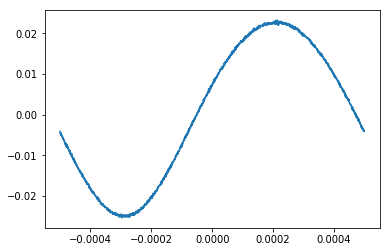

In [9]:
t, V = scope.ch1.read_channel()
plot.plot(t,V)

In [10]:
print(t)


[-0.0005    -0.0004996 -0.0004992 ...,  0.0004988  0.0004992  0.0004996]


In [11]:
print(V)

[-0.00412776 -0.00444528 -0.00444528 ..., -0.00412776 -0.00412776
 -0.00412776]


In [12]:
   scope.set_horizontal_scale(1e-4)

:ALLEV 548,"Measurement warning, Clipping positive; "



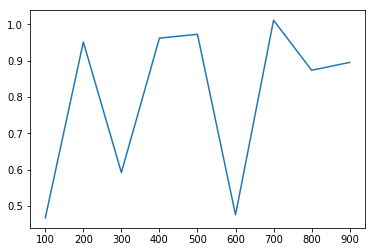

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
func_gen.ch1.set_function('sine')
func_gen.ch1.set_Vpp(4)
func_gen.ch1.set_offset(0)
f=[]
d=[]
a=100
while(a<1000): 
   
    func_gen.ch1.set_frequency(a)
    scope.ch1.set_smart_scale()
    scope.set_horizontal_scale(1/(4*a))                      
    c=scope.ch2.measure.Vpp()
    b=scope.ch1.measure.Vpp()
    d.append(a)
    e=b/c
    f.append(e)
    a=a+100
plt.plot(d,f)
plt.show()